Using the Wisconsin breast cancer diagnostic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
print(f'Libraries have been imported! :)')

df = pd.read_csv('data.csv')

df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

df.diagnosis = df.diagnosis.apply(lambda x:0 if x=='B' else 1).astype(int)
#df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

#print(df.tail())
print(f'Preview:\n\n{df.head()}')
print(' ')
print(df.describe(),'\n','\n')

Libraries have been imported! :)
Preview:

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0 

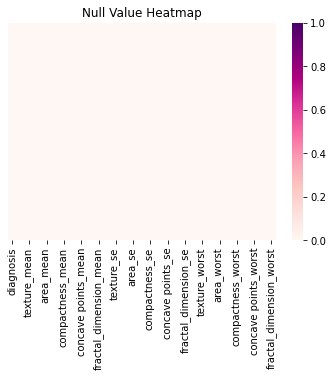

In [2]:
# simple heat map showing where we are missing data
heat_map = sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = "RdPu", vmin = 0, vmax = 1)
plt.title('Null Value Heatmap')
plt.show()

**The blank graph shows that there are no null values in the Data.**

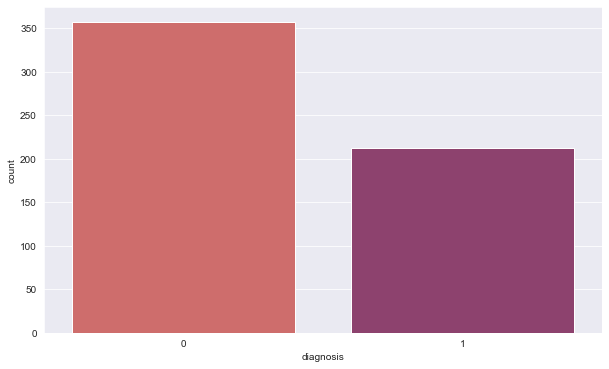

In [3]:
# a count plot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.countplot(data=df, x=df.diagnosis, palette='flare')
plt.show()


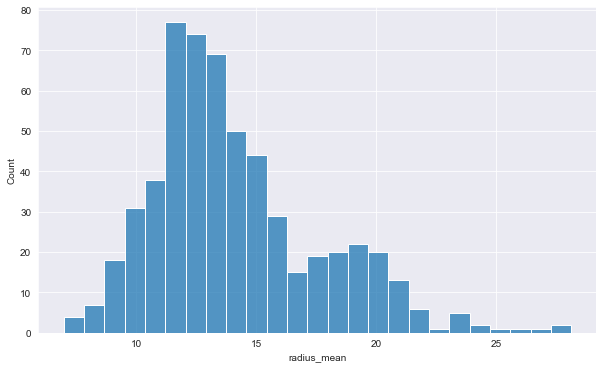

In [4]:
# let's check out the spread of mean radius using a histogram\
plt.figure(figsize = (10,6))
sns.histplot(df.radius_mean,bins = 25)
plt.show()

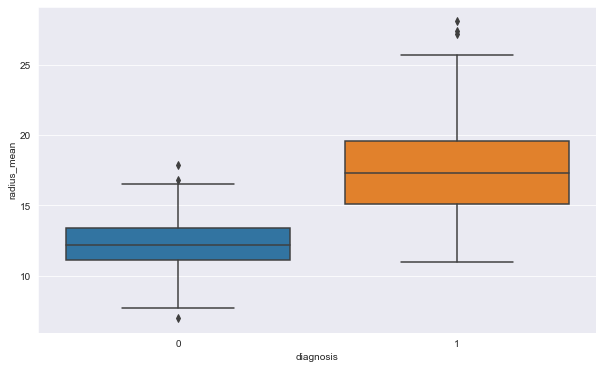

In [5]:
#Let’s visualize the average radius of a tumor by diagnosis via a box plot.
plt.figure(figsize = (10,6))
sns.boxplot(x=df.diagnosis,y=df.radius_mean,data=df)
plt.show()

**The Box-plot shows that those diagnosed with cancer tend to have larger radius when compared to those who don't.**

In [6]:
# calculate the average radius size by diagnosis (0 or 1)
print(df.groupby(df.diagnosis).radius_mean.mean(),'\n','\n')
print(df.info(),'\n','\n')
#print(df.columns,'\n','\n')


#Split data into X and y
X = df.drop('diagnosis',axis=1) #[1:100]
y = df.diagnosis #[1:100]

print('X: \n',X.tail(),'\n','\n','y: \n',y.tail(),'\n','\n')

#Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

diagnosis
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  pe

In [7]:
#Train and predict
mod = LogisticRegression()
mod.fit(X_train,y_train)
pred = mod.predict(X_test)

correct_pred= 0 
incorrect_pred = 0
idx = 0
for i in y_test:
    if i == pred[idx]:
        correct_pred += 1
        idx +=1
    else:
        incorrect_pred += 1
        idx += 1

print('No of correct pred = ','\t',correct_pred)
print('No of incorrect pred =  ',incorrect_pred,'\n','\n')
print('Prediction score: ',mod.score(X_test,y_test),'\n','\n')

No of correct pred =  	 162
No of incorrect pred =   9 
 

Prediction score:  0.9473684210526315 
 



C:\Users\Jeet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print(classification_report(y_test, pred),'\n','\n')
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        94
           1       0.97      0.91      0.94        77

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171
 
 



array([[92,  2],
       [ 7, 70]], dtype=int64)

**The Confusion Matrix shows that out of 94 predicted to not have breast cancer , 2 were falsely classified as they actually had cancer , while in case of 77 predicted to have cancer , 6 were falsely classified as they didnt have cancer.**

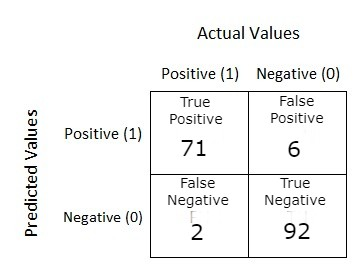